<b> Author - DIMPLE KILLO

# THE SPARKS FOUNDATION

# Task - 1  Prediction using Supervised ML 

Prediction of scores secured by the students based on the number of hours they
spent 

#importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
print("Data imported")
data

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<b><big><p>Describing the data</p></big></b>

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<b><big><p>Getting the data</p></big></b>

In [31]:
data.shape


(25, 2)

In [32]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<big><b>To pre check for any null data 

In [7]:
data.isnull == True

False

<big><b>EXPLORING THE DATASET

In [8]:

import seaborn as sns

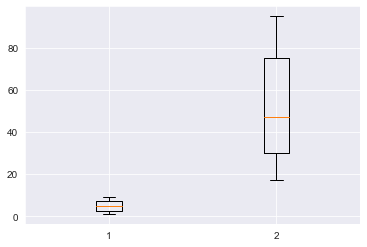

In [33]:
plt.boxplot(data)
plt.show()

<big><b>SCATTER PLOT</b></big>

<b><big><p>Scatter plots are the graphs that present the relationship between two variables in a data-set</p></big></b>

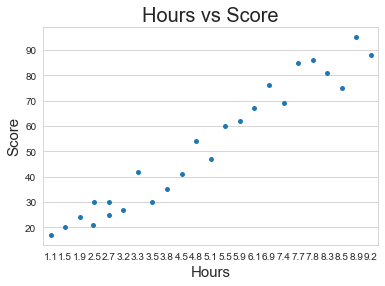

In [34]:
#plotting the Scatter plot to visual the data
sns.set_style('whitegrid')
sns.stripplot(x=data['Hours'], y=data['Scores'])
plt.title('Hours vs Score',fontsize = 20)
plt.xlabel('Hours',fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.show()

<big><b> REGRESSION PLOT</b></big>

<big><b>Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships

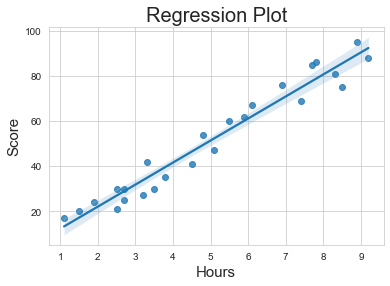

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [35]:
#plotting the Regression plot plot to visual the data
sns.set_style('whitegrid')
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=25)
plt.ylabel('Score', size=20)
plt.xlabel('Hours', size=20)
plt.show()
print(data.corr())

# Training the given model



In [36]:
from sklearn.model_selection import train_test_split

<big><b>SPLITTING THE DATA</b>

In [13]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [37]:
trainX,testX,trainY,testY = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [38]:
#splitting the data using PARETo
print("X train.shape =", trainX.shape)
print("Y train.shape =", trainY.shape)
print("X test.shape  =", testX.shape)
print("Y test.shape  =", testY.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


In [40]:
from sklearn.linear_model import LinearRegression

<big><b>FITTING THE DATA</b>

In [41]:
LR = LinearRegression()

In [43]:
LR.fit(trainX,trainY)
print("fitting the data")

fitting the data


In [44]:
print("X1 =",LR.intercept_,"\nX2 =",LR.coef_)
# X1 is Intercept & Slope of the line is X2.

X1 = 2.0181600414346974 
X2 = [9.91065648]


In [45]:
Y1 = LR.intercept_ + LR.coef_*trainX

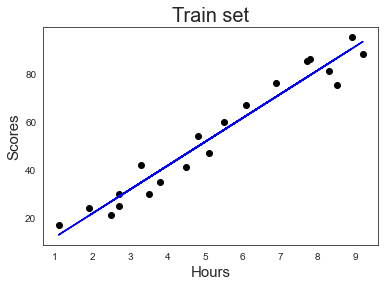

In [47]:
#plotting the graph
sns.set_style('white')
plt.scatter(trainX,trainY,color='black')
plt.title("Train set",fontsize=20)
plt.plot(trainX,Y1,color='blue')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show()

# Predicting the Percentage marks

In [48]:
#Test data scores
predicty = LReg.predict(testX)
prediction = pd.DataFrame({'Hours': [i[0] for i in testX], 'Predicted Marks': [k for k in predicty]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106


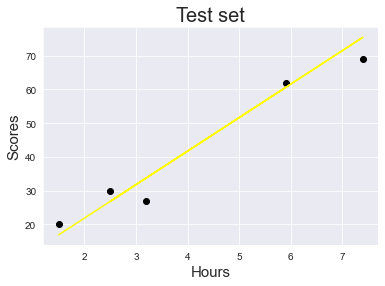

In [49]:
#plotting the graph
sns.set_style('darkgrid')
plt.plot(testX,predicty,color ='yellow')
plt.scatter(testX,testY,color='black')
plt.title("Test set",fontsize=20)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.show()

In [50]:
compare_scores = pd.DataFrame({'Actual Marks': testY, 'Predicted Marks': predicty})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106


<b><big><p> Stating Accuracy</p></big></b>

In [51]:
from sklearn import metrics

In [53]:
metrics.r2_score(testY,predicty)

0.9444592460908068

<b><big><p>The Accuracy of the model is 94.44 which is a GOOD MODEL</p></big></b>

# Error prediction by evaluating the model

In [54]:
#error prediction
from sklearn.metrics import mean_squared_error

<big><b>Chance of error

In [55]:
meanSquareError = metrics.mean_squared_error(testY,predicty)
print("Mean Squared Error is= ",meanSquareError)

Mean Squared Error is=  22.00746832897872


# Predicting the score

<h2><b>What will be the predicted score of a student if he/she studies for 9.25 hrs/day?</b>

In [58]:
score = LR.predict([[9.25]])
print("predicted score if a student studies 9.25 hours per day :",score)

predicted score if a student studies 9.25 hours per day : [93.69173249]


<big><b>if a student studies for 9.25 hrs/day then he/she is likely to score <u>  <span>93.61</span></u> percent marks</b></big>